# ANN with Keras

## Perceptron

In [30]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [31]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

In [32]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [33]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## TensorFlow

## Sequential API

### Classification

In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [35]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [36]:
X_train_full.shape

(60000, 28, 28)

In [37]:
# For simplicity purposes, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [39]:
class_names[y_train[0]]

'Coat'

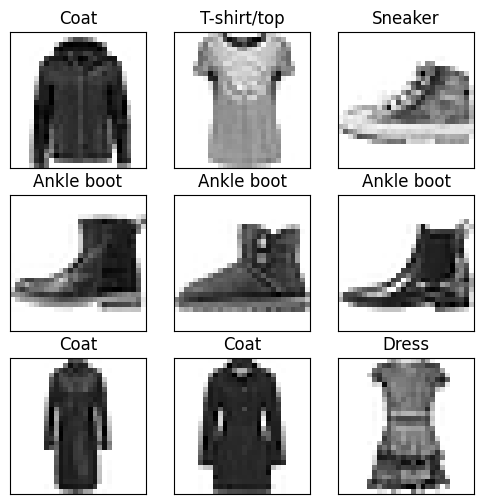

In [40]:
# Display first 9 images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False) # Remove grid
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # Show image in grayscale
    plt.title(class_names[y_train[i]])
plt.show()

In [41]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu")) #keras.activations.relu
# model.add(keras.layers.Dense(100, activation="relu")) #keras.activations.relu
# model.add(keras.layers.Dense(10, activation="softmax")) #keras.activations.softmax

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.layers

In [45]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [46]:
weights, bias = hidden1.get_weights()
weights

array([[ 3.20835710e-02, -5.41985631e-02, -6.00195415e-02, ...,
         5.21489233e-03, -6.38047308e-02,  1.41544491e-02],
       [ 3.30509245e-02,  6.49264157e-02, -1.13537535e-02, ...,
        -5.47876731e-02,  5.37819862e-02, -6.64682984e-02],
       [ 5.28828800e-02,  3.75866517e-02,  5.94108701e-02, ...,
         1.91336647e-02,  3.05234194e-02,  5.66390753e-02],
       ...,
       [ 1.58306286e-02,  4.23144847e-02, -5.60674407e-02, ...,
        -5.04211262e-02, -5.03073744e-02, -6.09006137e-02],
       [-2.83199027e-02, -4.37526330e-02,  4.87609878e-02, ...,
        -5.61330467e-03,  5.11811525e-02,  6.81477636e-02],
       [-1.01067647e-02, -2.53197737e-02, -2.08630152e-02, ...,
        -3.49571966e-02,  5.05171791e-02, -1.67116523e-05]], dtype=float32)

In [47]:
weights.shape

(784, 300)

In [48]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
bias.shape

(300,)

In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "sgd", metrics=["accuracy"])
# keras.losses.sparse_categorical_crossentropy.
# keras.optimizers.sgd
# keras.metrics.accuracy
# keras.metrics.sparse_categorical_accuracy

In [51]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
   1/1719 [..............................] - ETA: 7:11 - loss: 2.3670 - accuracy: 0.1250

2025-04-14 22:44:41.486730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7098 - accuracy: 0.7594

2025-04-14 22:44:48.713872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.7098 - accuracy: 0.7594 - val_loss: 0.5215 - val_accuracy: 0.8252
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5068 - accuracy: 0.8227 - val_loss: 0.4951 - val_accuracy: 0.8262
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4723 - accuracy: 0.8348 - val_loss: 0.4521 - val_accuracy: 0.8436
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4563 - accuracy: 0.8402 - val_loss: 0.4524 - val_accuracy: 0.8446
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4452 - accuracy: 0.8466 - val_loss: 0.4317 - val_accuracy: 0.8536
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4364 - accuracy: 0.8483 - val_loss: 0.4422 - val_accuracy: 0.8486
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4330 - accuracy: 0.8490 - val_loss: 0.4513 - val_accuracy: 0.8466
Epo

In [52]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

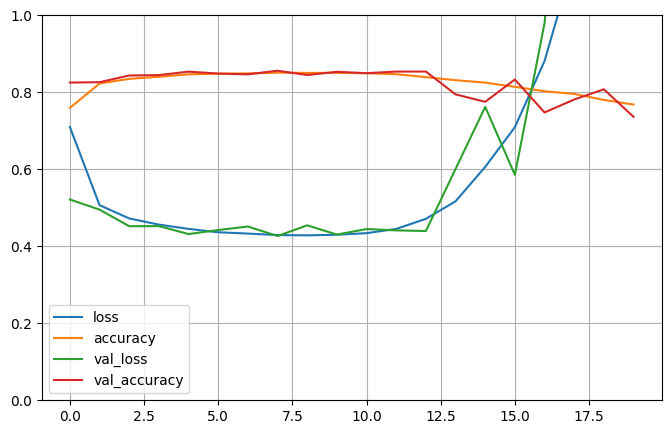

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [55]:
model.evaluate(X_test, y_test)

 17/313 [>.............................] - ETA: 0s - loss: 808.2688 - accuracy: 0.7004  

2025-04-14 22:59:19.587480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step - loss: 862.8861 - accuracy: 0.7097


[862.8861083984375, 0.7096999883651733]

In [56]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 198ms/step


2025-04-14 23:05:45.016251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Regression

In [14]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [15]:
X, y = california_housing.data, california_housing.target

In [16]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [17]:
tf.random.set_seed(42)
shape = X_train.shape[1:]
shape

(8,)

In [18]:
norm_layer = keras.layers.Normalization(input_shape = shape)

model = keras.models.Sequential([
    norm_layer,
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

In [19]:
optimizer = keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss= keras.losses.mean_squared_error, optimizer=optimizer, metrics= keras.metrics.mean_absolute_error)

The Normalization layer learns the feature means and standard deviations in the training data when you call the adapt() method. Yet when you display the model’s summary, these statistics are listed as non-trainable. This is because these parameters are not affected by
gradient descent.

In [20]:
norm_layer.adapt(X_train)

2025-04-15 21:08:13.135976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [75]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


2025-04-15 16:39:00.777405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 1.1856 - mean_absolute_error: 0.7108

2025-04-15 16:39:03.520767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 6ms/step - loss: 1.1856 - mean_absolute_error: 0.7108 - val_loss: 3.8137 - val_mean_absolute_error: 0.6551
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6251 - mean_absolute_error: 0.5505 - val_loss: 22.4165 - val_mean_absolute_error: 0.6239
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1587 - mean_absolute_error: 0.6253 - val_loss: 20.9895 - val_mean_absolute_error: 0.6331
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8553 - mean_absolute_error: 0.6259 - val_loss: 63.1688 - val_mean_absolute_error: 0.7921
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6604 - mean_absolute_error: 0.5671 - val_loss: 67.2742 - val_mean_absolute_error: 0.7048
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 1.9403 - mean_absolute_error: 0.7995 - val_loss: 48.1479 - val_mean_absolute_error: 0.7729
Epoch 7/20
363/363 [==

In [76]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 5ms/step - loss: 3.8098 - mean_absolute_error: 1.1128


In [77]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

2025-04-15 16:39:56.443476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 398ms/step


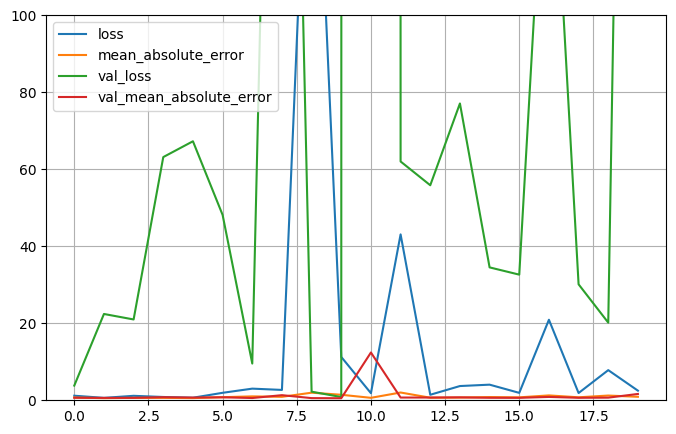

In [81]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 100) 
plt.show()

## Functional API

Wide_deep is an Non-Sequential Neural Network

See the Wide_deep image 

Single Input

In [39]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [40]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [41]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

Multi-Input

In [42]:
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])

norm_layer_1 = keras.layers.Normalization()
norm_layer_2 = keras.layers.Normalization()

hidden_layer1 = keras.layers.Dense(30, activation="relu")
hidden_layer2 = keras.layers.Dense(30, activation="relu")
concat_layer = keras.layers.Concatenate()
output_layer = keras.layers.Dense(1)

In [43]:
norm_wide = norm_layer_1(input_wide)
norm_deep = norm_layer_2(input_deep)
hidden1 = hidden_layer1(norm_deep)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([norm_wide, hidden2])
output = output_layer(concat)

model = keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [44]:
optimizer = keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer, metrics=keras.metrics.mean_absolute_error)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_1.adapt(X_train_wide)
norm_layer_2.adapt(X_train_deep) # Will throw error

2025-04-16 09:41:39.759218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-04-16 09:41:40.366561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [45]:
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20


2025-04-16 09:41:46.417373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.1760 - mean_absolute_error: 0.9492

2025-04-16 09:41:48.438907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 3s 5ms/step - loss: 2.1760 - mean_absolute_error: 0.9492 - val_loss: 35.2251 - val_mean_absolute_error: 0.7316
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9128 - mean_absolute_error: 0.5824 - val_loss: 51.6409 - val_mean_absolute_error: 0.7173
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 1.0815 - mean_absolute_error: 0.5625 - val_loss: 31.2365 - val_mean_absolute_error: 0.6466
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8381 - mean_absolute_error: 0.5566 - val_loss: 31.6595 - val_mean_absolute_error: 0.6510
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7221 - mean_absolute_error: 0.5604 - val_loss: 8.0380 - val_mean_absolute_error: 0.6509
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7320 - mean_absolute_error: 0.5831 - val_loss: 32.2947 - val_mean_absolute_error: 0.6564
Epoch 7/20
363/363 [==

In [46]:
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 52ms/step


2025-04-16 09:42:21.243620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Multi-Output

In [27]:
from tensorflow import keras

output = keras.layers.Dense(1)(hidden2)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [29]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [30]:
norm_layer_1.adapt(X_train_wide)
norm_layer_2.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))

Epoch 1/20


2025-04-15 21:16:09.890867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - ETA: 0s - loss: 2.4097 - dense_14_loss: 2.3125 - dense_15_loss: 3.2846 - dense_14_root_mean_squared_error: 1.5207 - dense_15_root_mean_squared_error: 1.8124

2025-04-15 21:16:15.127836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 6s 10ms/step - loss: 2.4097 - dense_14_loss: 2.3125 - dense_15_loss: 3.2846 - dense_14_root_mean_squared_error: 1.5207 - dense_15_root_mean_squared_error: 1.8124 - val_loss: 35.1431 - val_dense_14_loss: 37.6943 - val_dense_15_loss: 12.1820 - val_dense_14_root_mean_squared_error: 6.1396 - val_dense_15_root_mean_squared_error: 3.4903
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 1.1298 - dense_14_loss: 1.1293 - dense_15_loss: 1.1342 - dense_14_root_mean_squared_error: 1.0627 - dense_15_root_mean_squared_error: 1.0650 - val_loss: 81.3348 - val_dense_14_loss: 87.5064 - val_dense_15_loss: 25.7910 - val_dense_14_root_mean_squared_error: 9.3545 - val_dense_15_root_mean_squared_error: 5.0785
Epoch 3/20
363/363 [==============================] - 2s 7ms/step - loss: 1.5885 - dense_14_loss: 1.6366 - dense_15_loss: 1.1558 - dense_14_root_mean_squared_error: 1.2793 - dense_15_root_mean_squared_error: 1.0751 - val_loss: 69.0875 -

In [31]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 7ms/step - loss: 0.7776 - dense_14_loss: 0.7758 - dense_15_loss: 0.7941 - dense_14_root_mean_squared_error: 0.8808 - dense_15_root_mean_squared_error: 0.8911


In [32]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

2025-04-15 21:17:54.313882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 792ms/step


In [33]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))

1/1 [==============================] - 0s 17ms/step


# Subclassing

In [34]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units = 30,activation = "relu",  **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = keras.layers.Normalization()
        self.norm_layer_deep = keras.layers.Normalization()

        self.hidden1 = keras.layers.Dense(units, activation)
        self.hidden2 = keras.layers.Dense(units, activation)

        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


In [ ]:
#model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

# Saving and Restoring a Model

In [47]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


INFO:tensorflow:Assets written to: my_keras_model/assets


In [ ]:
loaded_model = tf.keras.models.load_model("my_keras_model")

You can also use save_weights() and load_weights() to save and load only the parameter values.

## Checkpoints

The fit() method accepts a callbacks argument that lets you specify a list of
objects that Keras will call before and after training, before and after each
epoch, and even before and after processing each batch. For example, the
ModelCheckpoint callback saves checkpoints of your model at regular
intervals during training, by default at the end of each epoch:

In [49]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)

In [ ]:
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), checkpoint = checkpoint_cb)

Implementing Early Stopping

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit((X_train_wide, X_train_deep), (y_train, y_train), epochs=20, validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)), checkpoint = early_stopping_cb)

Custom Callbacks

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")